<a href="https://colab.research.google.com/github/SoleromYess/Simulaci-n-II/blob/main/1erParcial_Examen/2_Problema_del_quiosquero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yessica Morelos Moreno
#**Problema del quiosquero**

Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente.


|**PERIÓDICOS**|**30**|**40**|**50**|**60**|**70**|  
|----------|--|--|--|--|--|
|**f(x)**|20%|25%|25%|20%|10%|


La tabla recoge por ejemplo que el 20 % del tiempo las ventas han sido de 30 periódicos. Teniendo en cuenta el coste de 0.20 euros por venta perdida y el coste de 0.10 euros por el reciclaje de cada periódico no vendido, determine el beneficio promedio diario si pide 50 periódicos cada día.

a) Por simulación

b) Analíticamente


**Solución**

> # **a) Por simulación** 
> 1. **Identificación de las variables**
>
> $x$: Número de ventas de periódicos 
>
> 2. **Se determina la distribución de probabilidad**
>
>|**PERIÓDICOS**|**30**|**40**|**50**|**60**|**70**|  
>|----------|--|--|--|--|--|
>|**f(x)**|20%|25%|25%|20%|10%|
>
> 3. **Distribución acumulada de probabilidad**
>
>|PERIÓDICOS|30|40|50|60|70|  
>|----------|--|--|--|--|--|
>|**f(x)**|20%|25%|25%|20%|10%|  
>|**F(x)**|0.20|0.45|0.70|0.90|1.00|
>
>4. **Intervalo de números aleatorios correspondiente a cada valor**
>
>|PERIÓDICOS|30|40|50|60|70|  
>|----------|--|--|--|--|--|
>|**f(x)**|20%|25%|25%|20%|10%|  
>|**F(x)**|0.20|0.45|0.70|0.90|1.00|  
>|**INTERVALO**|0 a 0.19|0.2 a 0.44|0.45 a 0.69|0.7 a 0.89|0.9 a 1|

> 5. **Modelo del sistema y Objetivos de la simulación**
>
>Se calcula el beneficio en un día, dado el número de periódicos solicitados.
>
>**Objetivo:** Mediante generación de números aleatorios para simular las ventas diarias en base a la tabla de frecuencias y tomando como entrada el número de periódicos solicitados por el quiosquero cada día, se obtendrá el beneficio promedio que el quiosquero ganaría por día, considerando también los costos asociados a las ventas perdidas y los periódicos no vendidos.
>
>Una forma de implementarlo es mediante el siguiente código.

In [60]:
#Librerías
import numpy as np
import random
import matplotlib.pyplot as plt

In [61]:
#Función que genera números aleatorios para simular las ventas diarias en base de la tabla de frecuencias
def ventas_sim():
    ventas=0
    u = random.random()
    if 0.0 <= u < 0.20:
        ventas = 30
    elif 0.20 <= u < 0.45:
        ventas = 40
    elif 0.45 <= u < 0.70:
        ventas = 50
    elif 0.70 <= u < 0.90:
        ventas = 60
    elif 0.90 <= u <= 1.00:
        ventas = 70
    return ventas

In [62]:
#Función que estima el beneficio por día dado el número de periódicos solicitados.
def beneficio(pedido):
    ben = 0
    ventas_reales = 0
    ventas_perdidas = 0
    no_vendidos = 0
    vs = ventas_sim()
    
    if vs > pedido: #condicional para evaluar el número de ventas perdidas
        ventas_reales = pedido
        ventas_perdidas = vs - pedido
        no_vendidos = 0
        
    else: #condicional para evaluar el número de periódicos no vendidos
        ventas_reales = vs
        ventas_perdidas = 0
        no_vendidos = pedido - ventas_reales
    
    #cálculo del beneficio en base a los costos
    ben = 1.10*ventas_reales - 0.90*pedido - 0.10*no_vendidos - 0.20*ventas_perdidas 
    return ben

>Aplicando la simulación para un pedido de **$50$ periódicos**.

In [63]:
print("El beneficio diario es: ",beneficio(50), "euros")

El beneficio diario es:  -2.0 euros


> 5. **Diseñe el experimento**
>
>Para estimar el beneficio promedio diario si se ordenan 50 periódicos cada día, se ejecutara $n$ veces las funciones anteriores y se calcularan de manera acumulativa el beneficio promedio.

In [64]:
num_dias = 1000
pedido_diario = 50

beneficios = [beneficio(pedido_diario) for i in range(num_dias)]
beneficio_promedio = sum(beneficios) / num_dias

print(f"El beneficio promedio diario es: {beneficio_promedio:.2f} euros")


El beneficio promedio diario es: 1.42 euros


In [65]:
def simulacion(n):
    L=[]
    benef = 0
    for i in range(n):
        benef += beneficio(50)
        L.append(benef/(i+1))
    return L

In [66]:
X=simulacion(10000)

Text(0, 0.5, 'Beneficio')

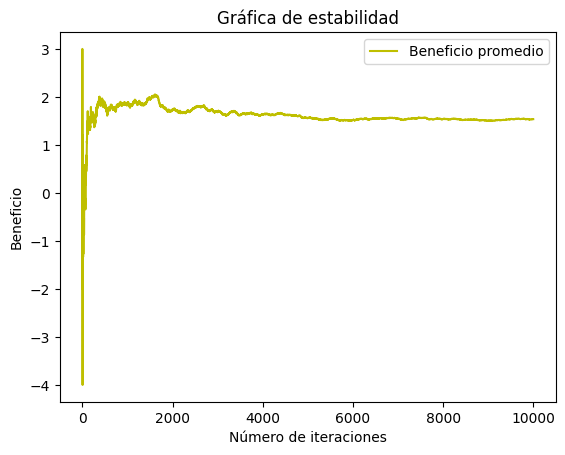

In [67]:
plt.plot(X, 'y-',label='Beneficio promedio')
plt.title('Gráfica de estabilidad')
plt.legend()
plt.xlabel('Número de iteraciones')
plt.ylabel('Beneficio')

In [68]:
np.mean(X)

1.6108859257969679

> 6. **Repita el experimento $n$ veces**
>
>Una forma de hacerlo es mediante el siguiente codigo.

In [69]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = simulacion(500)
        lista.append(np.mean(s))
    return lista

In [70]:
Y=modelo(500)

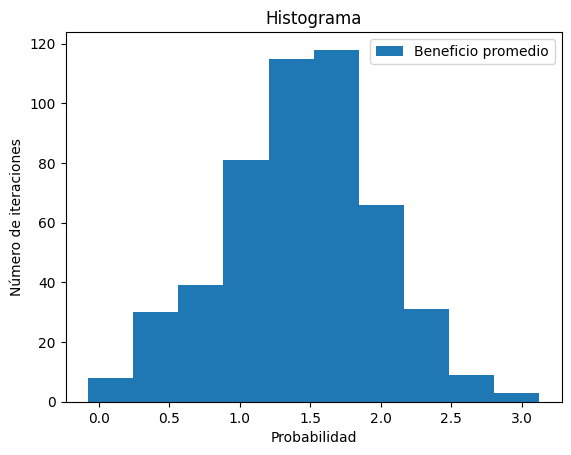

In [71]:
plt.hist(Y,label='Beneficio promedio')
plt.title('Histograma')
plt.legend()
plt.ylabel('Número de iteraciones')
plt.xlabel('Probabilidad')
plt.show()

In [72]:
print(np.mean(Y), np.std(Y))

1.4378063156603043 0.5454124000062197


>7. **Hallamos el intervalo de confianza.**
>
>$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [73]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(1.2866257114779542, 1.5889869198426543)

> # **b) Analíticamente** 
>Se deben calcular los ingresos y costos asociados dependiendo de la demanda.
>
> **Ingresos** = Precio de venta * Cantidad de periódicos vendidos
>
>Donde el precio de venta es = 1.10 euros por periódico
>
>**Costos** = (Costo por periódico * Cantidad de periódicos vendidos) + (Costo por venta perdida * Cantidad de periódicos no vendidos) + (Costo por reciclaje * Cantidad de periódicos no vendidos)
>
>**Costo por periódico** es de 0.90 euros.
>
>**Costo por venta perdida** es de 0.20 euros.
>
>**Costo por reciclaje** es de 0.10 euros.
>
>Los beneficios estan dadod por:
>
>**Beneficio** = Ingresos - Costos
>
>**Beneficio ponderado** = Beneficio * Porcentaje de tiempo
>
>**Beneficio promedio diario:**
>
>1. **30 periódicos:**
>
>Ingresos = 1.10 * 30 = 33 euros
>
>Costos = (0.90 * 30) + (0.20 * 20) + (0.10 * 20) = 27 + 4 + 2 = 33 euros
>
>Beneficio = Ingresos - Costos = 33 - 33 = 0 euros
>
>Beneficio ponderado = 0 * 0.20 = 0 euros
>
>2. **40 periódicos:**
>
>Ingresos = 1.10 * 40 = 44 euros
>
>Costos = (0.90 * 40) + (0.20 * 10) + (0.10 * 10) = 36 + 2 + 1 = 39 euros
>
>Beneficio = Ingresos - Costos = 44 - 39 = 5 euros
>
>Beneficio ponderado = 5 * 0.25 = 1.25 euros
>
>3. **Para 50 periódicos:**
>
>Ingresos = 1.10 * 50 = 55 euros
>
>Costos = (0.90 * 50) + (0.20 * 0) + (0.10 * 0) = 45 + 0 + 0 = 45 euros
>
>Beneficio = Ingresos - Costos = 55 - 45 = 10 euros
>
>Beneficio ponderado = 10 * 0.25 = 2.5 euros
>
>4. **Para 60 periódicos:**
>
>Ingresos = 1.10 * 60 = 66 euros
>
>Costos = (0.90 * 60) + (0.20 * 0) + (0.10 * 0) = 54 + 0 + 0 = 54 euros
>
>Beneficio = Ingresos - Costos = 66 - 54 = 12 euros
>
>Beneficio ponderado = 12 * 0.20 = 2.4 euros
>
>5. **Para 70 periódicos:**
>
>Ingresos = 1.10 * 70 = 77 euros
>
>Costos = (0.90 * 70) + (0.20 * 0) + (0.10 * 0) = 63 + 0 + 0 = 63 euros
>
>Beneficio = Ingresos - Costos = 77 - 63 = 14 euros
>
>Beneficio ponderado = 14 * 0.10 = 1.4 euros
>
>Luego, el **Beneficio promedio diario** = Suma de beneficios ponderados/5 = 1.51 euros
>
>Por lo tanto, el beneficio promedio diario para el quiosquero si pide 50 periódicos cada día es de 1.51 euros.